# Python Data Analysis

# **Obesity Dataset**

 **Libraries & Data Importing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


C:\Users\Khadi\AppData\Local\Temp\ipykernel_23460\2819085117.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Load the clean data from CSV file after cleaning and errors correction see file data_exploration_cleaning.ipynb 
df = pd.read_csv("modified_data.csv")

**Data Understanding (Asking Questions)**

***Check the content of the DataFrame***

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Classes
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,24.39,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,24.24,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,23.77,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,26.85,Overweight
4,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,28.34,Overweight


**Profile Report for the Dataset**

In [4]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

***What is the dimension of the data?***

In [5]:
df.shape

(2111, 18)

***How many rows and columns are there?***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   object 
 12  FAF                             21

***Are there columns types that need to be changed?***

In [7]:
# Change the data type of 'NCP Round' from int to object
df['NCP'] = df['NCP'].astype('object')
df['FCVC'] = df['FCVC'].astype('object')
df['TUE'] = df['TUE'].astype('object')
df['CH2O'] = df['CH2O'].astype('object')
df['FAF'] = df['FAF'].astype('object')
# Check the data type
print(df['NCP'].dtype)
print(df['FCVC'].dtype)
print(df['TUE'].dtype)
print(df['CH2O'].dtype)
print(df['FAF'].dtype)

object
object
object
object
object


In [8]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                               object
NCP                                object
CAEC                               object
SMOKE                              object
CH2O                               object
SCC                                object
FAF                                object
TUE                                object
CALC                               object
MTRANS                             object
BMI                               float64
Classes                            object
dtype: object

**Data Wrangling(Cleaning & Manipulation)**

***Are there any missing values/ dupliceted data?***

In [9]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
BMI                               0
Classes                           0
dtype: int64

In [10]:
df.duplicated().any()

True

In [11]:
df.duplicated().sum()

24

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Classes
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,24.39,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,24.24,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,23.77,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,26.85,Overweight
4,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,28.34,Overweight


***Double check for the columns names***

In [14]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BMI', 'Classes'],
      dtype='object')

In [15]:
#check the names of the classes
df['Classes'].unique()

array(['Normal_Weight', 'Overweight', 'Obesity_Type_I',
       'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III'],
      dtype=object)

In [16]:
df['Classes'].value_counts()


Overweight             552
Obesity_Type_I         368
Obesity_Type_II        338
Normal_Weight          296
Obesity_Type_III       268
Insufficient_Weight    265
Name: Classes, dtype: int64

**Data Analysis & Visualisation EDA**

**Statistical Analysis**

In [17]:
#Statistical Analysis on numerical columns
desc_stats = df[['Age', 'Height', 'Weight', 'BMI']].describe().round(2)
desc_stats

,Age,Height,Weight,BMI
count,2087.00,2087.00,2087.00,2087.00
mean,24.35,1.70,86.86,29.77
std,6.37,0.09,26.19,8.02
min,14.00,1.45,39.00,13.00
25%,19.92,1.63,66.00,24.37
50%,22.85,1.70,83.10,28.90
75%,26.00,1.77,108.02,36.10
max,61.00,1.98,173.00,50.81


**Univariant Analysis**

**Bar chart for categorical features**


***What is the distribution of alcohol consumption levels among the participants?***

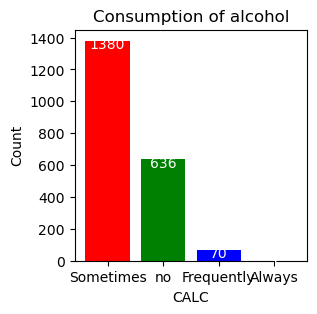

In [18]:
# #A bar chart for consumption of alcohol

# Get the count of each unique value in 'CALC'
count_data = df['CALC'].value_counts()

# Plotting
plt.figure(figsize=(3, 3))

# Setting title and labels
plt.title('Consumption of alcohol')
plt.xlabel('CALC')
plt.ylabel('Count')
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc'))
plt.grid(False) 
# Adding textual annotations below each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05*max(count_data.values)), round(yval, 2), ha='center', va='bottom', color='white')

plt.show()


***What is the distribution of transportation modes among the participants?***


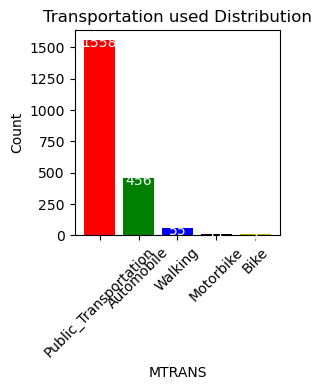

In [19]:

# Get the count of each unique value in 'MTRANS'
count_data = df['MTRANS'].value_counts()

# Plotting
plt.figure(figsize=(3, 4))
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])

# Setting title and labels
plt.title('Transportation used Distribution')
plt.xlabel('MTRANS')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.grid(False)
# Adding textual annotations below each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05*max(count_data.values)), round(yval, 2), ha='center', va='bottom', color='white')

plt.tight_layout()
plt.show()

***What is the distribution of smokers and non-smokers among the participants?***

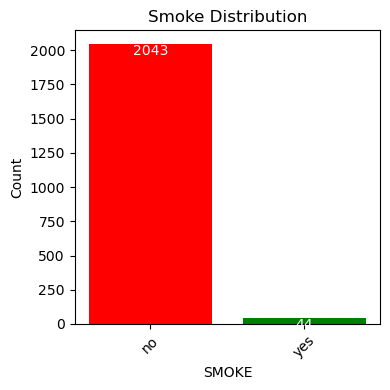

In [20]:

# Get the count of each unique value in 'SMOKE'
count_data = df['SMOKE'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])

# Setting title and labels
plt.title('Smoke Distribution')
plt.xlabel('SMOKE')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(False)
# Adding textual annotations below each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05*max(count_data.values)), round(yval, 2), ha='center', va='bottom', color='white')

plt.tight_layout()
plt.show()


***How many participants actively monitor their calorie consumption versus those who do not?***

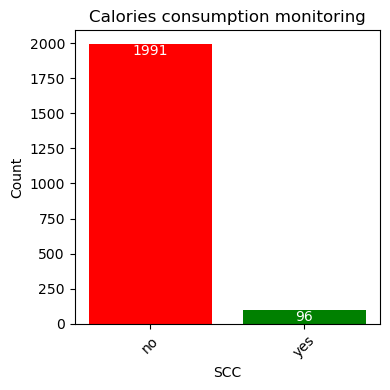

In [21]:

# Get the count of each unique value in 'SCC'
count_data = df['SCC'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])

# Setting title and labels
plt.title('Calories consumption monitoring')
plt.xlabel('SCC')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.grid(False)
# Adding textual annotations below each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05*max(count_data.values)), round(yval, 2), ha='center', va='bottom', color='white')

plt.tight_layout()
plt.show()


***How many participants frequently consume high-caloric foods versus those who do not?***

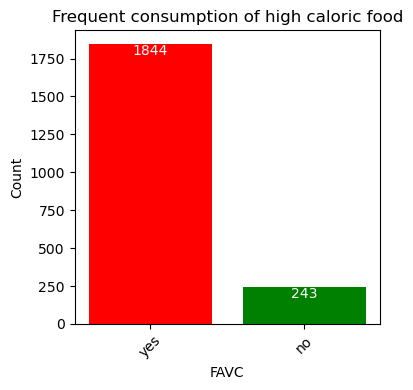

In [22]:

# Get the count of each unique value in 'FAVC'
count_data = df['FAVC'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])
# Setting title and labels
plt.title('Frequent consumption of high caloric food')
plt.xlabel('FAVC')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability (optional)
plt.grid(False)
# Adding textual annotations below each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05*max(count_data.values)), round(yval, 2), ha='center', va='bottom', color='white')

plt.tight_layout()
plt.show()


***How do participants vary in their habits of consuming food between their main meals?***

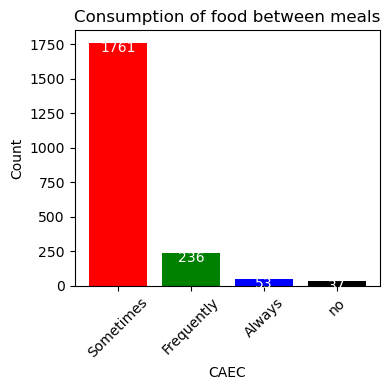

In [23]:

# Get the count of each unique value in 'CAEC'
count_data = df['CAEC'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])

# Setting title and labels
plt.title('Consumption of food between meals')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability (optional)
plt.grid(False)
# Adding textual annotations below each bar and labels on top
for bar in bars:
    yval = bar.get_height()
    
    # Annotation below bar
    plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05*max(count_data.values)), round(yval, 2), ha='center', va='bottom', color='white')
    

plt.tight_layout()
plt.show()




***How many participants in the dataset have a family history of being overweight versus those who don't?***

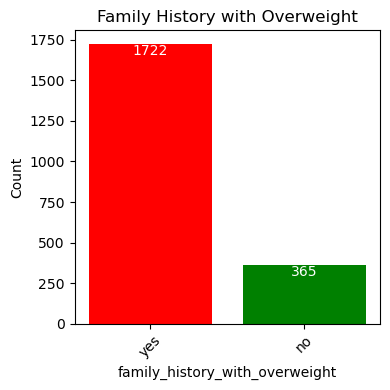

In [24]:

# Get the count of each unique value in 'family_history_with_overweight'
count_data = df['family_history_with_overweight'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))

bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])

# Setting title and labels
plt.title('Family History with Overweight')
plt.xlabel('family_history_with_overweight')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability (optional)
plt.grid(False)
# Adding textual annotations below each bar and labels on top
for bar in bars:
    yval = bar.get_height()
    
    # Annotation below bar
    plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05*max(count_data.values)), round(yval, 2), ha='center', va='bottom', color='white')
    
plt.tight_layout()
plt.show()


***How many male and female participants are there in the dataset?***

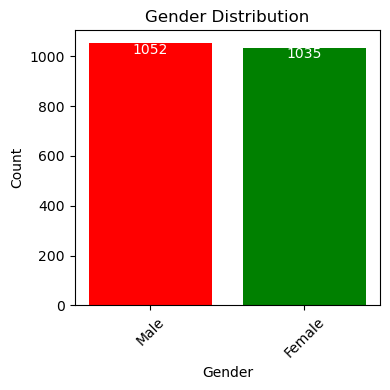

In [25]:

# Get the count of each unique value in 'Gender'
count_data = df['Gender'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])
# Setting title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.grid(False)
# Adding textual annotations below each bar and labels on top
for bar in bars:
    yval = bar.get_height()
    
    # Annotation below bar
    plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05*max(count_data.values)), round(yval, 2), ha='center', va='bottom', color='white')
    
    

plt.tight_layout()
plt.show()


***How is the distribution of the number of main meals (NCP) among the participants?***

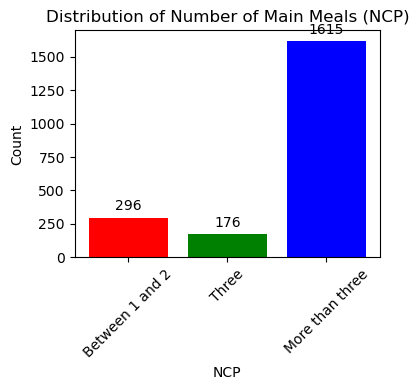

In [26]:
# Get the count of each unique value in 'NCP'
count_data = df['NCP'].value_counts().sort_index()

# Define a mapping of values to labels
label_mapping = {
    1: 'Between 1 and 2',
    2: 'Three',
    3: 'More than three'
}

# Adjust count_data index to reflect these labels
count_data.index = [label_mapping[val] for val in count_data.index]

# Plotting
plt.figure(figsize=(4, 4))
colors = plt.cm.Paired(range(len(count_data)))  # A colormap to give distinct colors to the bars
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])
# Setting title and labels
plt.title('Distribution of Number of Main Meals (NCP)')
plt.xlabel('NCP')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability
plt.grid(False)
# Adding labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.02*max(count_data.values)), str(yval), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


***How are participants distributed in terms of their physical activity frequency?***
***Note: 0 - I do not have, 1 - 1 or 2 days, 2 - 2 or 4 days, 3 - 4 or 5 days***

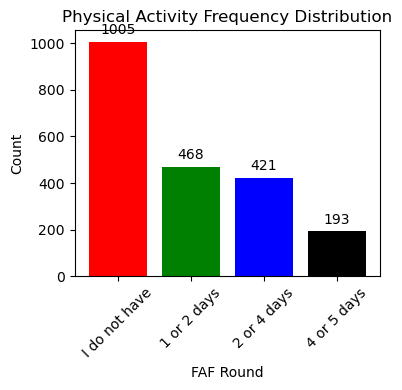

In [27]:

# Get the count of each unique value in 'FAF'
count_data = df['FAF'].value_counts().sort_index()

# Define a mapping of values to labels
label_mapping = {
    0: 'I do not have',
    1: '1 or 2 days',
    2: '2 or 4 days',
    3: '4 or 5 days'
}

# Adjust count_data index to reflect these labels
count_data.index = [label_mapping[val] for val in count_data.index]

# Plotting
plt.figure(figsize=(4, 4))
colors = plt.cm.Paired(range(len(count_data)))  # A colormap to give distinct colors to the bars

bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])
# Setting title and labels
plt.title('Physical Activity Frequency Distribution')
plt.xlabel('FAF Round')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability
plt.grid(False)
# Adding labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.02*max(count_data.values)), str(yval), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


***How many respondents consume vegetables at different frequencies?***

***Never 1, Sometimes 2 and Always 3***

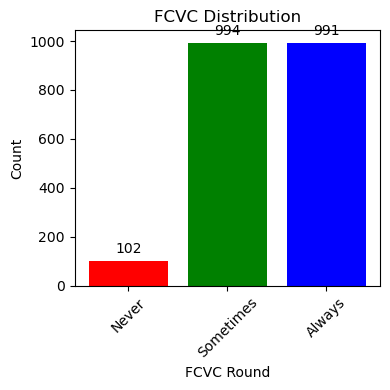

In [28]:
# Get the count of each unique value in 'FCVC'
count_data = df['FCVC'].value_counts().sort_index()

# Define a mapping of values to labels
label_mapping = {
    1: 'Never',
    2: 'Sometimes',
    3: 'Always'
}

# Adjust count_data index to reflect these labels
count_data.index = [label_mapping[val] for val in count_data.index]

# Plotting
plt.figure(figsize=(4, 4))
colors = plt.cm.Paired(range(len(count_data)))  # A colormap to give distinct colors to the bars

bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])
# Setting title and labels
plt.title('FCVC Distribution')
plt.xlabel('FCVC Round')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability
plt.grid(False)
# Adding labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.02*max(count_data.values)), str(yval), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()




***How is water consumption distributed among the dataset?1-Less than a liter,2-Between 1 and 2 L and 3-More than 2 L***



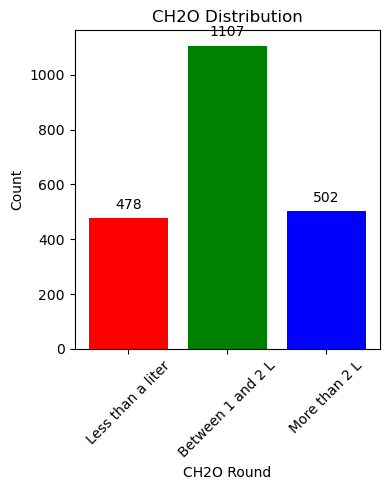

In [29]:

# Get the count of each unique value in 'CH2O'
count_data = df['CH2O'].value_counts().sort_index()

# Define a mapping of values to labels
label_mapping = {
    1: 'Less than a liter',
    2: 'Between 1 and 2 L',
    3: 'More than 2 L'
}

# Adjust count_data index to reflect these labels
count_data.index = [label_mapping[val] for val in count_data.index]

# Plotting
plt.figure(figsize=(4, 5))
colors = plt.cm.Paired(range(len(count_data)))  # A colormap to give distinct colors to the bars
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])
# Setting title and labels
plt.title('CH2O Distribution')
plt.xlabel('CH2O Round')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability
plt.grid(False)
# Adding labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.02*max(count_data.values)), str(yval), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


***How is the time spent using technology devices distributed among the participants in the dataset?***


***0(0–2 hours),1(3–5 hours) and 2(More than 5 hours)***

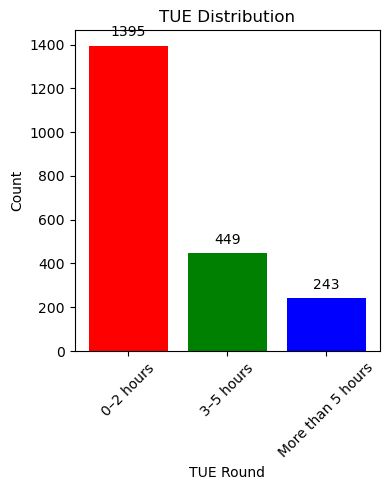

In [30]:
# Get the count of each unique value in 'TUE'
count_data = df['TUE'].value_counts().sort_index()

# Define a mapping of values to labels
label_mapping = {
    0: '0–2 hours',
    1: '3–5 hours',
    2: 'More than 5 hours'
}

# Adjust count_data index to reflect these labels
count_data.index = [label_mapping[val] for val in count_data.index]

# Plotting
plt.figure(figsize=(4, 5))
colors = plt.cm.Paired(range(len(count_data)))  # A colormap to give distinct colors to the bars
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])

# Setting title and labels
plt.title('TUE Distribution')
plt.xlabel('TUE Round')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability
plt.grid(False)
# Adding labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.02*max(count_data.values)), str(yval), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()




***How are participants distributed across different obesity classes?***

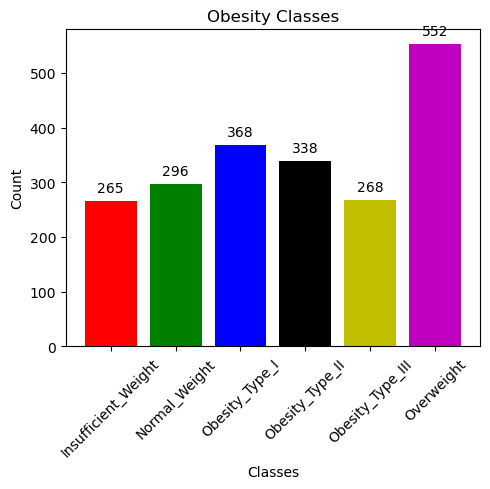

In [31]:
# Get the count of each unique value in 'Classes'
count_data = df['Classes'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(5, 5))
colors = plt.cm.viridis(range(len(count_data)))  # Using the viridis colormap to give distinct colors to the bars
bars = plt.bar(count_data.index, count_data.values, color=list('rgbkymc')[0:len(count_data)])
# Setting title and labels
plt.title('Obesity Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)  
# Adding labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.02*max(count_data.values)), str(yval), ha='center', va='bottom', color='black')
plt.grid(False)
plt.tight_layout()
plt.show()


***How are the demographic and physical characteristics, age, weight, height, and BMI, distributed among the participants in the dataset?***

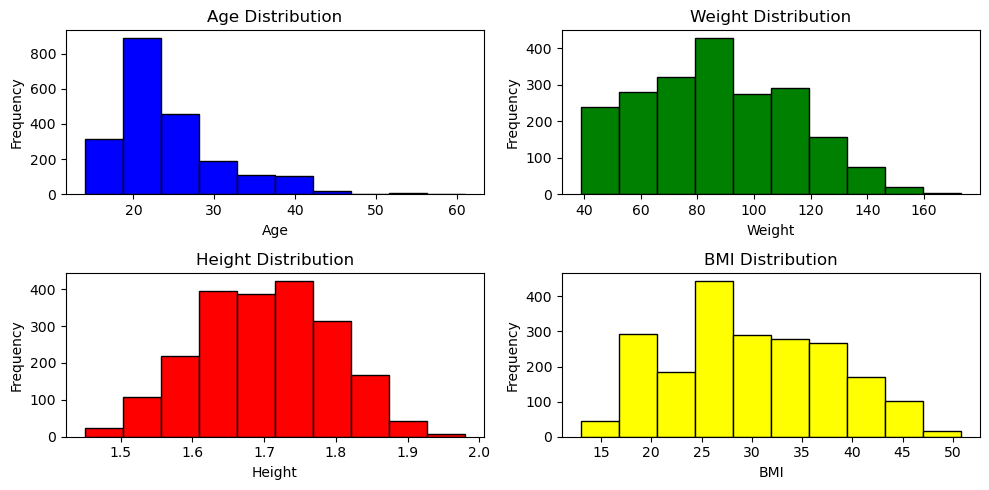

In [32]:

# Create a subset of the dataframe
subset_df = df[['Age', 'Weight', 'Height', 'BMI']]

# Plot histograms
plt.figure(figsize=(10, 5))

# Manually specify positions
ax1 = plt.subplot(2, 2, 1)
subset_df['Age'].hist(ax=ax1, color='blue', edgecolor='black')
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.grid(False)

ax2 = plt.subplot(2, 2, 2)
subset_df['Weight'].hist(ax=ax2, color='green', edgecolor='black')
ax2.set_title('Weight Distribution')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Frequency')
ax2.grid(False)

ax3 = plt.subplot(2, 2, 3)
subset_df['Height'].hist(ax=ax3, color='red', edgecolor='black')
ax3.set_title('Height Distribution')
ax3.set_xlabel('Height')
ax3.set_ylabel('Frequency')
ax3.grid(False)

ax4 = plt.subplot(2, 2, 4)
subset_df['BMI'].hist(ax=ax4, color='yellow', edgecolor='black')
ax4.set_title('BMI Distribution')
ax4.set_xlabel('BMI')
ax4.set_ylabel('Frequency')
ax4.grid(False)

plt.tight_layout()
plt.show()


***Box plot/violet plot for numerical features***

***What is the distribution, central tendency, and spread of ages, as well as potential outliers, among the participants in the dataset?***

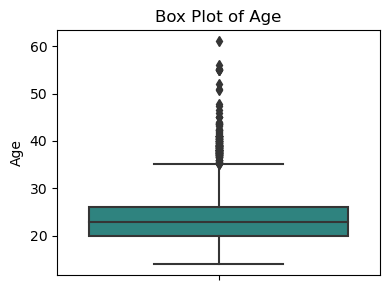

In [33]:

# Box plot for Age
plt.figure(figsize=(4, 3))
sns.boxplot(data=df, y="Age", palette="viridis") 
plt.title("Box Plot of Age")
plt.ylabel("Age")
plt.tight_layout()

plt.show()



***What is the distribution, central tendency, and spread of heights, as well as potential outliers, among the participants in the dataset?***

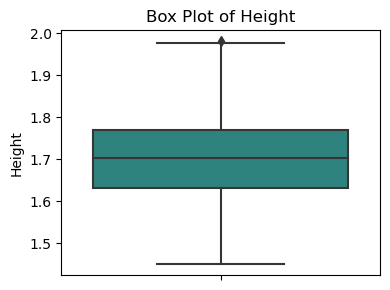

In [34]:

# Box plot for Height
plt.figure(figsize=(4, 3))
sns.boxplot(data=df, y="Height", palette="viridis")  # You can change "viridis" to any other suitable palette
plt.title("Box Plot of Height")
plt.ylabel("Height")
plt.tight_layout()

plt.show()

***How is the weight distribution among the participants, and where are the major concentrations of data points? Additionally, how does the distribution compare in terms of symmetry, width, and tails?***

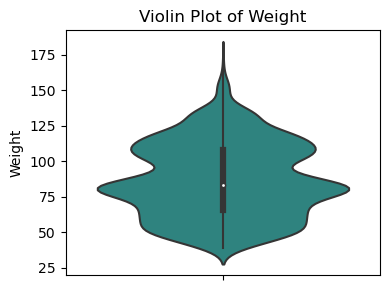

In [35]:
# Violin plot for Weight
plt.figure(figsize=(4, 3))
sns.violinplot(data=df, y="Weight", palette="viridis") 
plt.title("Violin Plot of Weight")
plt.ylabel("Weight")
plt.tight_layout()

plt.show()

***What is the distribution of BMI values among the participants, including the median, quartiles, and potential outliers?***

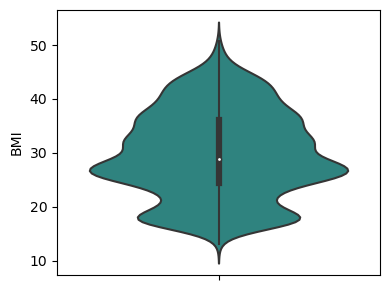

In [36]:
# Violin plot for BMI
plt.figure(figsize=(4, 3))
sns.violinplot(data=df, y="BMI", palette="viridis") 
plt.ylabel("BMI")
plt.tight_layout()

plt.show()



**Bivariante Analysis**

***How does weight vary with age among the participants in the dataset?***

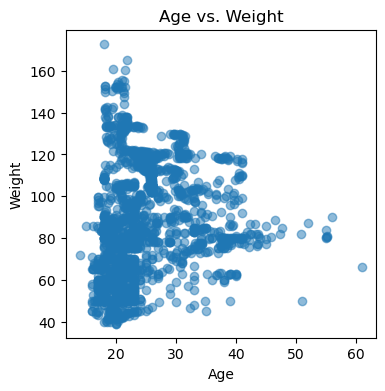

In [37]:
# Scatter plot for Age vs. Height
plt.figure(figsize=(4, 4))
plt.scatter(df["Age"], df["Weight"], alpha=0.5)
plt.title("Age vs. Weight")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.grid(False)

***How does height vary with age among the participants in the dataset?***

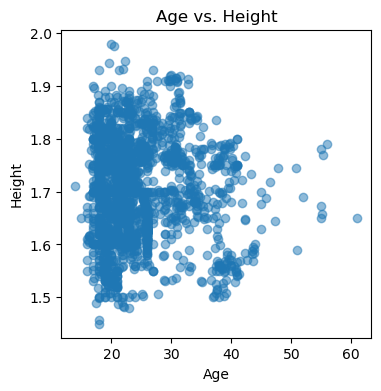

In [38]:

# Scatter plot for Age vs. Height
plt.figure(figsize=(4, 4))
plt.scatter(df["Age"], df["Height"], alpha=0.5)
plt.title("Age vs. Height")
plt.xlabel("Age")
plt.ylabel("Height")
plt.grid(False)
#plt.show()



***Is there a correlation between height and weight?***

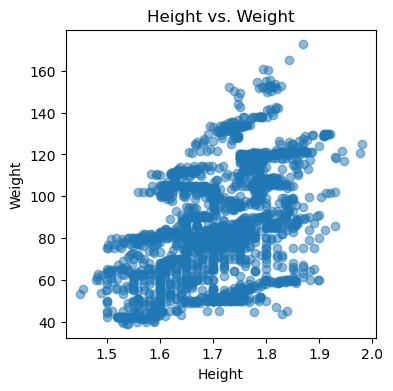

In [39]:
# Scatter plot for Height vs. Weight
plt.figure(figsize=(4, 4))
plt.scatter(df["Height"], df["Weight"], alpha=0.5)
plt.title("Height vs. Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid(False) 
plt.show()



***Is there correlation between BMI and the age ?***

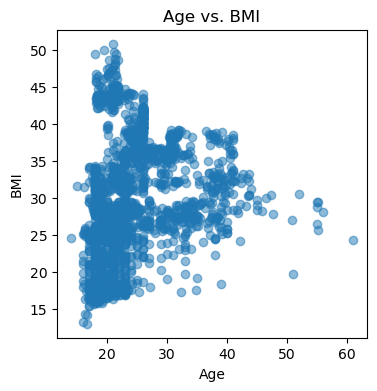

In [40]:
# Scatter plot for Weight vs BMI
plt.figure(figsize=(4, 4))
plt.scatter(df["Age"], df["BMI"], alpha=0.5)
plt.title("Age vs. BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(False) 

***Is the distribution of BMI values consistent across all heights, or are there specific height ranges where BMI varies more or less?***

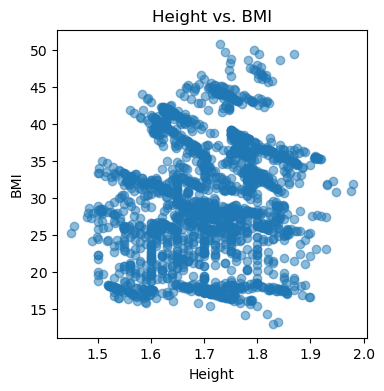

In [41]:
# Scatter plot for Weight vs BMI
plt.figure(figsize=(4, 4))
plt.scatter(df["Height"], df["BMI"], alpha=0.5)
plt.title("Height vs. BMI")
plt.xlabel("Height")
plt.ylabel("BMI")
plt.grid(False) 

***Is the relationship between weight and BMI consistent across all weight ranges?***

Text(0, 0.5, 'BMI')

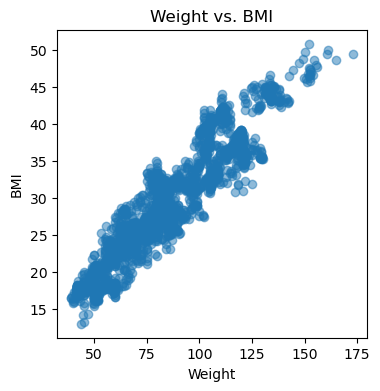

In [42]:
# Scatter plot for Weight vs BMI
plt.figure(figsize=(4, 4))
plt.scatter(df["Weight"], df["BMI"], alpha=0.5)
plt.title("Weight vs. BMI")
plt.xlabel("Weight")
plt.grid(False)
plt.ylabel("BMI")

***How does the classes distribution differ between individuals who smoke and those who do not?***

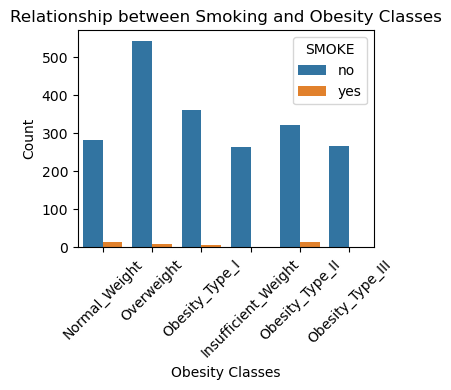

In [43]:
# Count plot to show the relation between smoke and classes
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x="Classes", hue="SMOKE")  # using hue to differentiate smokers from non-smokers within each class
plt.title("Relationship between Smoking and Obesity Classes")
plt.xlabel("Obesity Classes")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.grid(False) 
plt.show()

***How does the count of smokers and non-smokers differ between genders?***

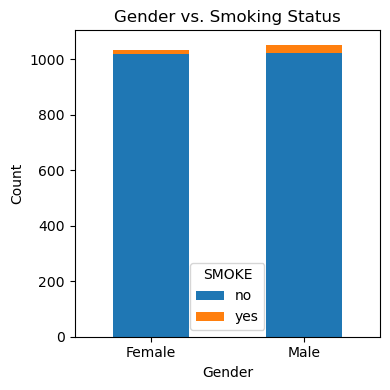

In [44]:

# Create a crosstab to count the number of smokers and non-smokers by gender
ct = pd.crosstab(df['Gender'], df['SMOKE'])

# Plotting the grouped bar chart
ct.plot(kind='bar', stacked=True, figsize=(4, 4))

plt.title('Gender vs. Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Adjust based on preference
plt.tight_layout()
plt.grid(False) 
plt.show()


***How does the distribution of family history with overweight vary between genders?***

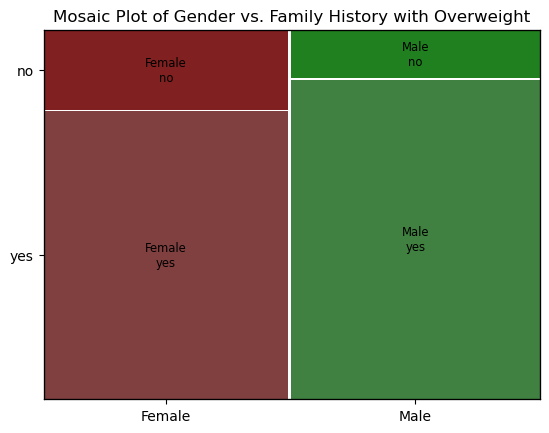

In [45]:
# Create a contingency table
contingency = pd.crosstab(df['Gender'], df['family_history_with_overweight'])

# Plotting the mosaic plot
mosaic(df, ['Gender', 'family_history_with_overweight'], title='Mosaic Plot of Gender vs. Family History with Overweight')
plt.show()


***How does alcohol consumption vary between different genders in the dataset?***

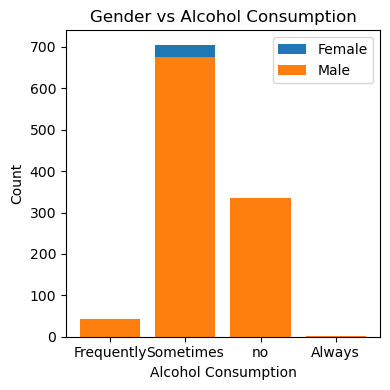

In [46]:

# Group by Gender and Alcohol to get the count
grouped = df.groupby(['Gender', 'CALC']).size().reset_index(name='Count')

# Plotting
fig, ax = plt.subplots(figsize=(4,4))

for gender in df['Gender'].unique():
    subset = grouped[grouped['Gender'] == gender]
    ax.bar(subset['CALC'], subset['Count'], label=gender)

ax.set_title("Gender vs Alcohol Consumption")
ax.set_xlabel("Alcohol Consumption")
ax.set_ylabel("Count")
ax.legend()
plt.grid(False) 
plt.tight_layout()
plt.show()

plt.show()


**Multivariant Analysis**

***How are the variables Age, Weight, Height, and BMI linearly related to each other in the dataset?***

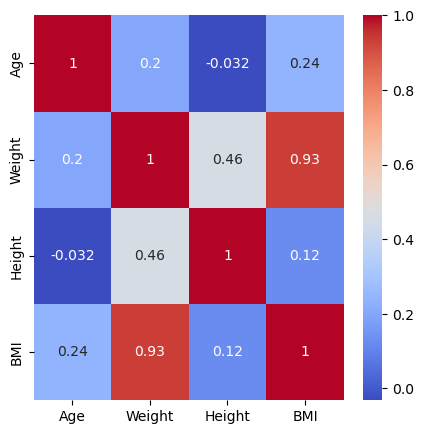

In [47]:
# Create a subset of the dataframe
subset_df = df[['Age', 'Weight', 'Height', 'BMI']]

# Compute the correlation matrix for the subset
correlation_matrix = subset_df.corr()

# Plot the heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Optionally, you can save the figure
plt.savefig('correlation_heatmap_subset.png')
plt.show()


***How do the average BMI, Height, and Weight metrics differ between males and females in the dataset?"***

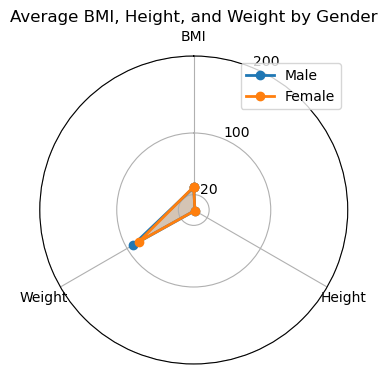

In [48]:
# Calculate average values for BMI, Height, and Weight by gender
grouped = df.groupby('Gender').mean()[['BMI', 'Height', 'Weight']]

# Labels for our plot
labels = np.array(['BMI', 'Height', 'Weight'])

# Values for males and females
male_values = grouped.loc['Male'].values
female_values = grouped.loc['Female'].values

# Calculate angles
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
male_values = np.concatenate((male_values, [male_values[0]]))  
female_values = np.concatenate((female_values, [female_values[0]]))  
angles = np.concatenate((angles, [angles[0]]))  

# Plot
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={'projection': 'polar'})
ax.plot(angles, male_values, 'o-', linewidth=2, label="Male")
ax.fill(angles, male_values, alpha=0.25)
ax.plot(angles, female_values, 'o-', linewidth=2, label="Female")
ax.fill(angles, female_values, alpha=0.25)

# Add a title
ax.set_title("Average BMI, Height, and Weight by Gender")

# Set the tick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# To make the radar chart a full circle
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Set y labels

ax.set_yticks([20, 100, 200])  # Modify these values based on your data range
ax.set_yticklabels(["20", "100", "200"])

ax.legend(loc="upper right")

plt.show()



***How does the distribution of height and weight vary across different age groups and genders, and are there noticeable patterns or outliers that can be identified from the data?***

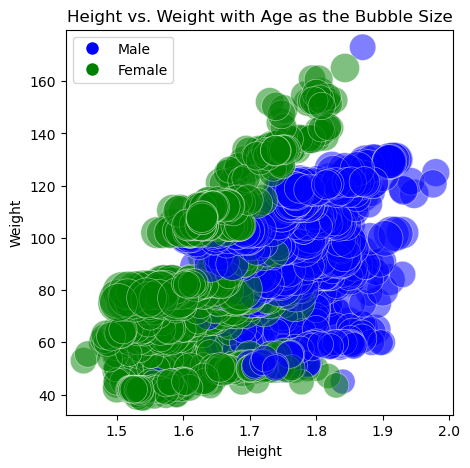

In [49]:


# Seting the size for the 'Age' bubbles by multiply by a constant for better visibility.
bubble_size = df['Age'] * 20  

# Define a color mapping based on gender
colors = df['Gender'].map({'Male': 'blue', 'Female': 'green'})  

plt.figure(figsize=(5, 5))

# Create the bubble chart. The 's' parameter determines the size of each bubble, and 'c' parameter sets the color.
plt.scatter(df['Height'], df['Weight'], s=bubble_size, c=colors, alpha=0.5, edgecolors="w", linewidth=0.5)

# Adding titles and labels
plt.title("Height vs. Weight with Age as the Bubble Size")
plt.xlabel("Height")
plt.ylabel("Weight")

# If you want to add a legend for the colors
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                    plt.Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='green')],
           loc="upper left")
plt.grid(False) 
# Show the plot
plt.show()


***Are people using a particular transportation method more likely to monitor their calorie consumption or frequently consume high caloric food?***

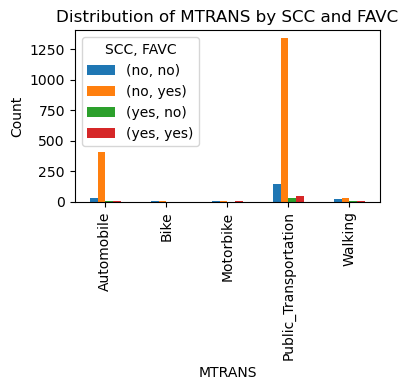

In [50]:

# Grouping data
grouped = df.groupby(['MTRANS', 'SCC', 'FAVC']).size().reset_index(name='Count')

# Pivot table to create a multi-index dataframe for plotting
pivot_grouped = grouped.pivot_table(values='Count', index='MTRANS', columns=['SCC', 'FAVC'], fill_value=0)

# Plot
ax = pivot_grouped.plot(kind='bar', figsize=(4,4))
ax.set_ylabel('Count')
ax.set_title('Distribution of MTRANS by SCC and FAVC')
plt.tight_layout()
plt.grid(False)
plt.legend(title="SCC, FAVC")
plt.show()
